Import libraries

In [2]:
import pandas as pd  
import matplotlib.pyplot as plt 
import numpy as np 
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.ensemble import RandomForestClassifier 
from sklearn.svm import SVC 
from sklearn.linear_model import LogisticRegression 
from sklearn import preprocessing
from sklearn import metrics 
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import joblib
import warnings 
warnings.filterwarnings('ignore')
plt.style.use('ggplot')

Read csv file (train and test data)

In [3]:
train_data = pd.read_csv("/media/mowli/New Volume/Guvi/capston/FN/Loan_status prediction/Loan_Status_train.csv")
test_data = pd.read_csv("/media/mowli/New Volume/Guvi/capston/FN/Loan_status prediction/Loan_Status_test.csv")


In [4]:
df = train_data.copy()
df_test = test_data.copy()

In [5]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [6]:
df_test

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban
...,...,...,...,...,...,...,...,...,...,...,...,...
362,LP002971,Male,Yes,3+,Not Graduate,Yes,4009,1777,113.0,360.0,1.0,Urban
363,LP002975,Male,Yes,0,Graduate,No,4158,709,115.0,360.0,1.0,Urban
364,LP002980,Male,No,0,Graduate,No,3250,1993,126.0,360.0,NaN,Semiurban
365,LP002986,Male,Yes,0,Graduate,No,5000,2393,158.0,360.0,1.0,Rural


In [7]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

LabelEncoder

In [8]:

label_encoder = preprocessing.LabelEncoder()  
df['Gender']= label_encoder.fit_transform(df['Gender']) 
df['Married']= label_encoder.fit_transform(df['Married']) 
df['Education']= label_encoder.fit_transform(df['Education']) 
df['Gender']= label_encoder.fit_transform(df['Gender']) 
df['Self_Employed']= label_encoder.fit_transform(df['Self_Employed']) 
df['Property_Area']= label_encoder.fit_transform(df['Property_Area']) 
df['Dependents'] = label_encoder.fit_transform(df['Dependents'])


In [9]:
df_test['Gender']= label_encoder.fit_transform(df_test['Gender']) 
df_test['Married']= label_encoder.fit_transform(df_test['Married']) 
df_test['Education']= label_encoder.fit_transform(df_test['Education']) 
df_test['Gender']= label_encoder.fit_transform(df_test['Gender']) 
df_test['Self_Employed']= label_encoder.fit_transform(df_test['Self_Employed']) 
df_test['Property_Area']= label_encoder.fit_transform(df_test['Property_Area']) 
df_test['Dependents'] = label_encoder.fit_transform(df_test['Dependents'])


Fill null values with mode and mean values

In [10]:
df['Credit_History'].fillna(df['Credit_History'].mode(), inplace=True) # Mode
df_test['Credit_History'].fillna(df_test['Credit_History'].mode(), inplace=True) # Mode
df['LoanAmount'].fillna(df['LoanAmount'].mean(), inplace=True) # Mean
df_test['LoanAmount'].fillna(df_test['LoanAmount'].mean(), inplace=True) # Mean
df['Gender'].fillna(df['Gender'].mode()[0], inplace=True)
df_test['Gender'].fillna(df_test['Gender'].mode()[0], inplace=True)

df['Dependents'].fillna(df['Dependents'].mode()[0], inplace=True)
df_test['Dependents'].fillna(df_test['Dependents'].mode()[0], inplace=True)

df['Married'].fillna(df['Married'].mode()[0], inplace=True)
df_test['Married'].fillna(df_test['Married'].mode()[0], inplace=True)

df['Credit_History'].fillna(df['Credit_History'].mean(), inplace=True)
df_test['Credit_History'].fillna(df_test['Credit_History'].mean(), inplace=True)

df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mean(), inplace=True)
df_test['Loan_Amount_Term'].fillna(df_test['Loan_Amount_Term'].mean(), inplace=True)

In [11]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [12]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,0,0,5849,0.0,146.412162,360.0,1.0,2,Y
1,LP001003,1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0,N
2,LP001005,1,1,0,0,1,3000,0.0,66.000000,360.0,1.0,2,Y
3,LP001006,1,1,0,1,0,2583,2358.0,120.000000,360.0,1.0,2,Y
4,LP001008,1,0,0,0,0,6000,0.0,141.000000,360.0,1.0,2,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,0,0,0,0,0,2900,0.0,71.000000,360.0,1.0,0,Y
610,LP002979,1,1,3,0,0,4106,0.0,40.000000,180.0,1.0,0,Y
611,LP002983,1,1,1,0,0,8072,240.0,253.000000,360.0,1.0,2,Y
612,LP002984,1,1,2,0,0,7583,0.0,187.000000,360.0,1.0,2,Y


Data visualization

In [13]:
# df.info()

In [14]:
# df.info()

<Axes: >

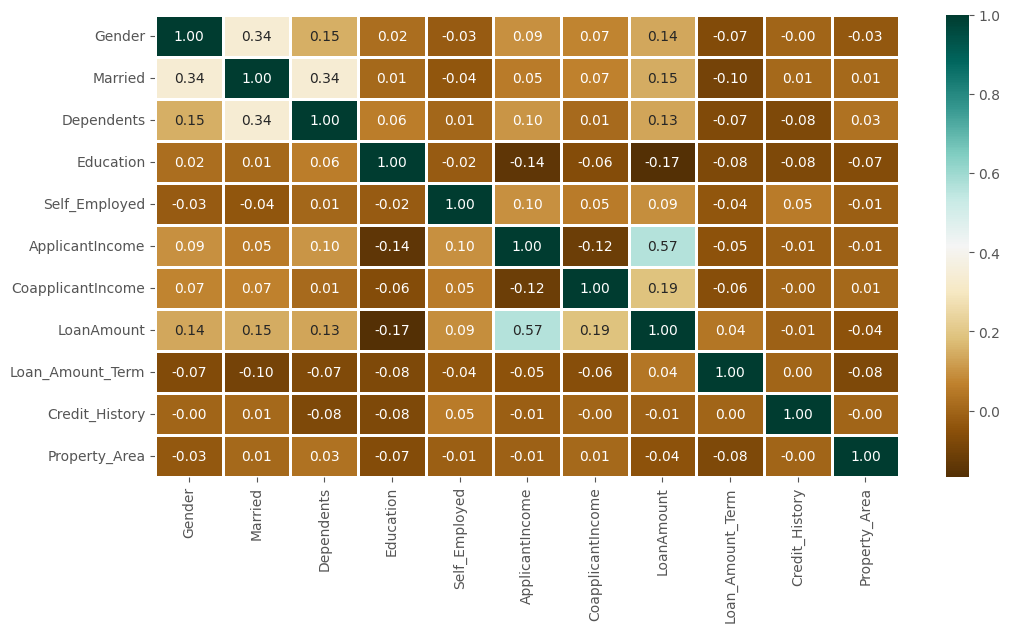

In [15]:
plt.figure(figsize=(12,6)) 
data = df.drop(['Loan_ID','Loan_Status'],axis=1)  
sns.heatmap(data.corr(),cmap='BrBG',fmt='.2f', 
            linewidths=2,annot=True)

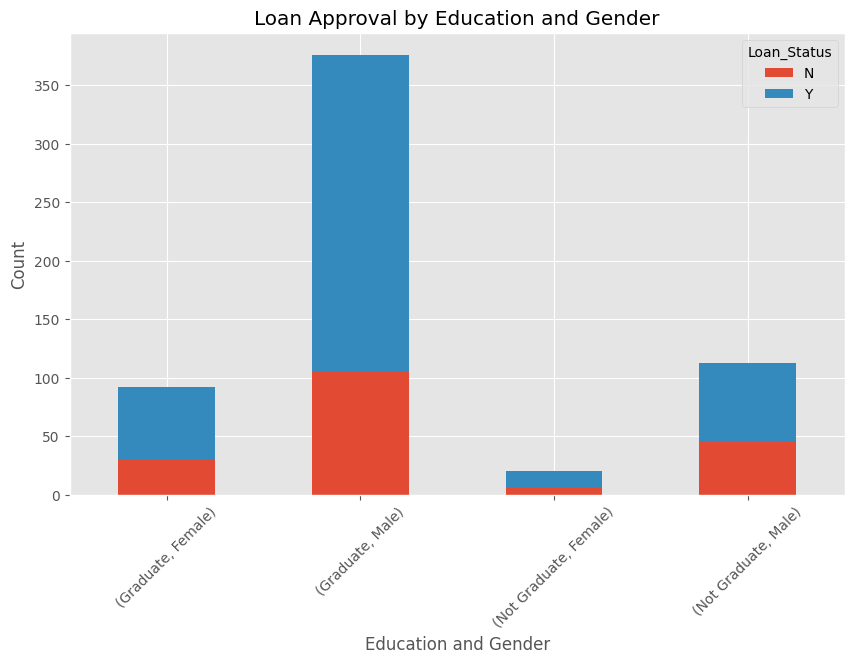

In [16]:
loan_status_counts = train_data.groupby(['Education', 'Gender', 'Loan_Status']).size().unstack(fill_value=0)
loan_status_counts.plot(kind="bar", stacked=True, figsize=(10, 6))

plt.title('Loan Approval by Education and Gender')
plt.xlabel('Education and Gender')
plt.ylabel('Count')
plt.xticks(rotation=45)  
plt.legend(title='Loan_Status')
plt.show()

In [17]:
set(df['Self_Employed'])

{0, 1, 2}

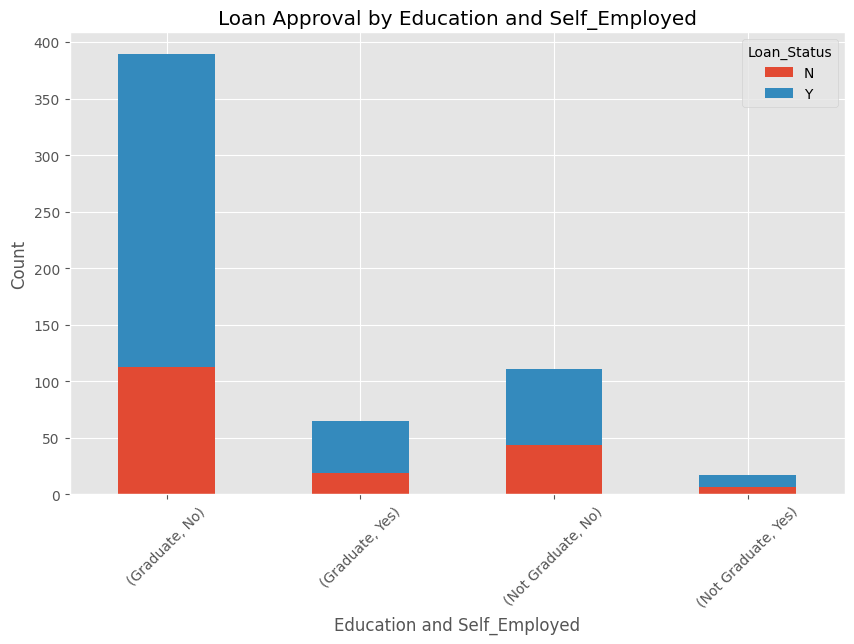

In [18]:
self_employe_count =  train_data.groupby(['Education', 'Self_Employed', 'Loan_Status']).size().unstack(fill_value=0)
self_employe_count.plot(kind="bar", stacked=True, figsize=(10, 6))

plt.title('Loan Approval by Education and Self_Employed')
plt.xlabel('Education and Self_Employed')
plt.ylabel('Count')
plt.xticks(rotation=45)  
plt.legend(title='Loan_Status')
plt.show()

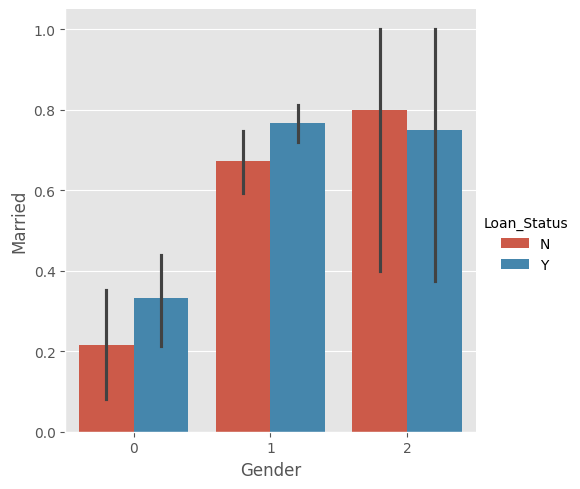

In [19]:
sns.catplot(x="Gender", y="Married", 
            hue="Loan_Status",  
            kind="bar",  
            data=df)

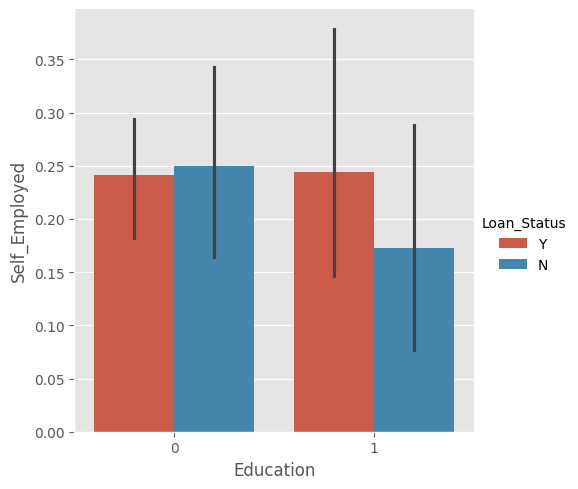

In [20]:
sns.catplot(x="Education", y="Self_Employed", 
            hue="Loan_Status",  
            kind="bar",  
            data=df)

Model Train and Evaluation

In [21]:
df['Loan_Status'] = label_encoder.fit_transform(df['Loan_Status'])

In [22]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,0,0,5849,0.0,146.412162,360.0,1.0,2,1
1,LP001003,1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,LP001005,1,1,0,0,1,3000,0.0,66.000000,360.0,1.0,2,1
3,LP001006,1,1,0,1,0,2583,2358.0,120.000000,360.0,1.0,2,1
4,LP001008,1,0,0,0,0,6000,0.0,141.000000,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,0,0,0,0,0,2900,0.0,71.000000,360.0,1.0,0,1
610,LP002979,1,1,3,0,0,4106,0.0,40.000000,180.0,1.0,0,1
611,LP002983,1,1,1,0,0,8072,240.0,253.000000,360.0,1.0,2,1
612,LP002984,1,1,2,0,0,7583,0.0,187.000000,360.0,1.0,2,1


In [27]:
from sklearn.model_selection import train_test_split

train_features = ['Gender','Education','Self_Employed','ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History','Property_Area']

x = df[train_features].values
y = df['Loan_Status'].values

In [28]:
# x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=2)
x_train, x_test, y_train, y_test = train_test_split(x, y, 
                                                    test_size=0.4) 


In [40]:
knn = KNeighborsClassifier(n_neighbors=3) 
rfc = RandomForestClassifier(n_estimators = 200, max_depth= 5,
                             criterion = 'entropy',max_features='sqrt',
                             random_state =42) 
svc = SVC() 
lc = LogisticRegression() 
xb = XGBClassifier()
for clf in (xb,rfc,lc,knn,svc):
    clf.fit(x_train,y_train)
    y_pred = clf.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision =  precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1score = f1_score(y_test, y_pred)
    print("Accuracy score of ",clf.__class__.__name__, f"{accuracy:.2f}")
    print("Precision score of ",clf.__class__.__name__, f"{precision:.2f}")
    print("Recall score of ",clf.__class__.__name__, f"{recall:.2f}")
    print("f1score score of ",clf.__class__.__name__, f"{f1score:.2f}")
    print("=========================================")
    print("\n")

Accuracy score of  XGBClassifier 0.75
Precision score of  XGBClassifier 0.78
Recall score of  XGBClassifier 0.89
f1score score of  XGBClassifier 0.83


Accuracy score of  RandomForestClassifier 0.81
Precision score of  RandomForestClassifier 0.79
Recall score of  RandomForestClassifier 0.99
f1score score of  RandomForestClassifier 0.88


Accuracy score of  LogisticRegression 0.78
Precision score of  LogisticRegression 0.77
Recall score of  LogisticRegression 0.96
f1score score of  LogisticRegression 0.86


Accuracy score of  KNeighborsClassifier 0.65
Precision score of  KNeighborsClassifier 0.70
Recall score of  KNeighborsClassifier 0.84
f1score score of  KNeighborsClassifier 0.77


Accuracy score of  SVC 0.68
Precision score of  SVC 0.68
Recall score of  SVC 1.00
f1score score of  SVC 0.81




/media/mowli/New Volume/Guvi/capston/FN/.venv/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [31]:
predict_test = rfc.predict(x_test)
print('Target on test data',predict_test) 

Target on test data [1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 0 1 1 1 1 1 1 0 1 0 1 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 0 0 1 1 1 0 0 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0
 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 0 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 0 1 1 0 1
 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1
 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 0 1]


Save model

In [32]:

rfc.fit(x_train, y_train)
filename = 'loan_sts.pkl'
joblib.dump(rfc, filename)


['loan_sts.pkl']

loan model and test

In [33]:
loaded_model = joblib.load(filename)
result = loaded_model.score(x_test, y_test)
print(result)

0.8089430894308943


In [34]:
df_test

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,1,1,0,0,0,5720,0,110.0,360.0,1.000000,2
1,LP001022,1,1,1,0,0,3076,1500,126.0,360.0,1.000000,2
2,LP001031,1,1,2,0,0,5000,1800,208.0,360.0,1.000000,2
3,LP001035,1,1,2,0,0,2340,2546,100.0,360.0,0.825444,2
4,LP001051,1,0,0,1,0,3276,0,78.0,360.0,1.000000,2
...,...,...,...,...,...,...,...,...,...,...,...,...
362,LP002971,1,1,3,1,1,4009,1777,113.0,360.0,1.000000,2
363,LP002975,1,1,0,0,0,4158,709,115.0,360.0,1.000000,2
364,LP002980,1,0,0,0,0,3250,1993,126.0,360.0,0.825444,1
365,LP002986,1,1,0,0,0,5000,2393,158.0,360.0,1.000000,0


In [35]:
train_features = ['Gender','Education','Self_Employed','ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History','Property_Area']

x = df_test[train_features].values

In [36]:
a = [1,0,0,5720,0,110.0,360.0,1.0,2]
b = [1,0,0,6000,0.0,141.0,360.0,1.0,2]
c = [0,0,1,4583,0.0,133.0,360.0,0.0,1]

In [37]:
loaded_model.predict([a])

array([1])

In [38]:
loaded_model.predict([b])

array([1])

In [39]:
loaded_model.predict([c])

array([0])